In [27]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [29]:
column_names = ['MPG', 'Cylinders', 'Displacement','Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values='?', comment='\t',
                          sep = ' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [30]:
dataset.shape

(398, 8)

In [31]:
dataset = dataset.dropna()

In [32]:
dataset.shape

(392, 8)

In [33]:
dataset.pop('Origin')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [34]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
print(train_dataset)
test_dataset = dataset.drop(train_dataset.index)
print(test_dataset)

      MPG  Cylinders  Displacement  ...  Weight  Acceleration  Model Year
146  28.0          4          90.0  ...  2125.0          14.5          74
282  22.3          4         140.0  ...  2890.0          17.3          79
69   12.0          8         350.0  ...  4456.0          13.5          72
378  38.0          4         105.0  ...  2125.0          14.7          82
331  33.8          4          97.0  ...  2145.0          18.0          80
..    ...        ...           ...  ...     ...           ...         ...
281  19.8          6         200.0  ...  2990.0          18.2          79
229  16.0          8         400.0  ...  4220.0          11.1          77
150  26.0          4         108.0  ...  2391.0          15.5          74
145  32.0          4          83.0  ...  2003.0          19.0          74
182  28.0          4         107.0  ...  2464.0          15.5          76

[314 rows x 7 columns]
      MPG  Cylinders  Displacement  ...  Weight  Acceleration  Model Year
9    15.0     

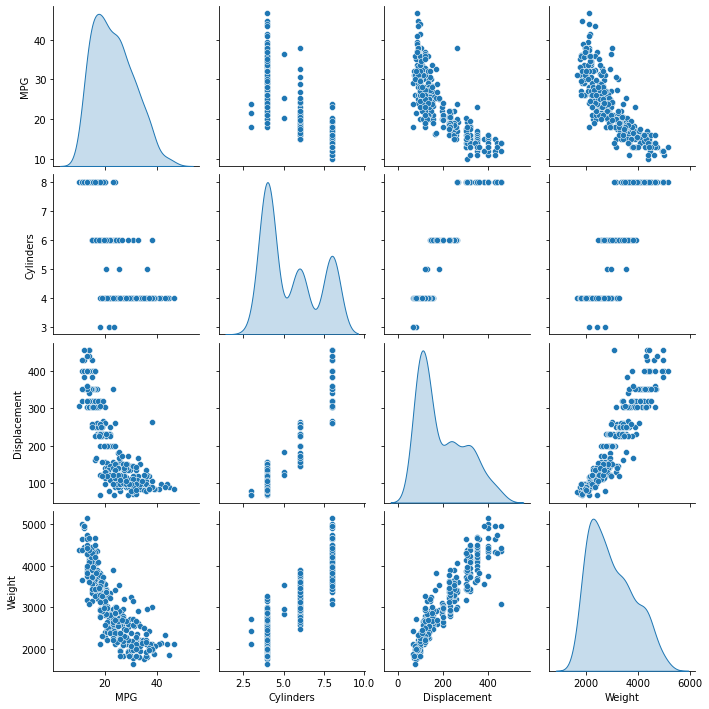

In [35]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [36]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [37]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [38]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [39]:
inputs = keras.Input(shape=(normed_train_data.shape[1],))
h = layers.Dense(64)(inputs)
outputs = layers.Dense(1)(h)

In [40]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [41]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.001))

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


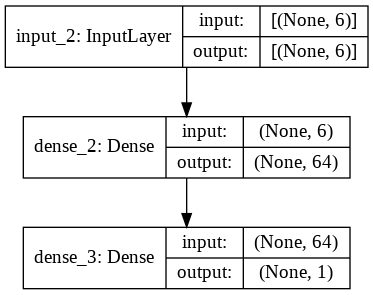

In [43]:
keras.utils.plot_model(model, "my_first_model_with_shpae_info.png", show_shapes=True)

In [44]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.1492314 ],
       [-0.36640647],
       [ 0.6034992 ],
       [-0.5452711 ],
       [-0.47471815],
       [-0.07419307],
       [-0.49421448],
       [-0.5066964 ],
       [ 0.09502816],
       [-0.10450749]], dtype=float32)

In [45]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 592.8850 - val_loss: 609.9489
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 580.5259 - val_loss: 598.8521
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 570.8134 - val_loss: 588.5198
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 561.6187 - val_loss: 578.5191
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 553.0894 - val_loss: 569.3353
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 544.6351 - val_loss: 560.6870
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 536.3159 - val_loss: 551.4357
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 527.6625 - val_loss: 542.2078
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 519.0773 - val_loss: 533.0375
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 510.2976 - val_los

In [46]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=[early_stop])

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 12.2745 - val_loss: 11.9516
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 12.2822 - val_loss: 12.0324
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 12.2094 - val_loss: 11.9666
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 12.3568 - val_loss: 12.0394
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 12.2540 - val_loss: 12.0300
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 12.3439 - val_loss: 11.9365
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 12.2935 - val_loss: 11.9222
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 12.2529 - val_loss: 12.0905
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 12.2202 - val_loss: 12.0231
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 12.2458 - val_loss: 11.9319
Epoch 11

In [47]:
loss = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(loss))

3/3 - 0s - loss: 10.8996
테스트 세트의 평균 절대 오차: 10.90 MPG


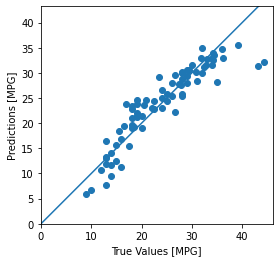

In [48]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [49]:
inputs = keras.Input(shape=(normed_train_data.shape[1],))
h = layers.Dense(64)(inputs)
h = layers.Activation('relu')(h)
h = layers.Dense(32)(h)
outputs = layers.Dense(1)(h)

In [50]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001))

In [51]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


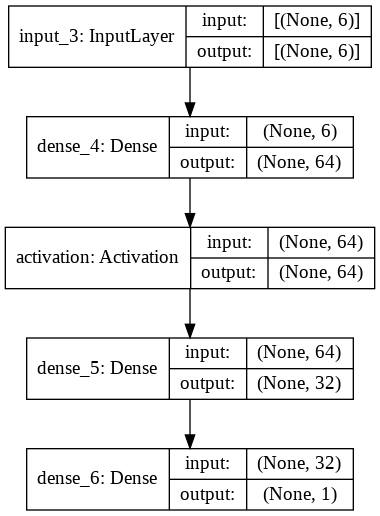

In [52]:
keras.utils.plot_model(model, "my_first_model_with_shpae_info.png", show_shapes=True)

In [53]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.15475926],
       [ 0.01530164],
       [ 1.2887638 ],
       [-0.22375995],
       [-0.01109707],
       [ 0.55694854],
       [ 0.0534108 ],
       [ 0.40428102],
       [ 0.01547065],
       [ 0.25385928]], dtype=float32)

In [54]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 547.1547 - val_loss: 529.8239
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 488.2998 - val_loss: 474.0305
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 436.3299 - val_loss: 418.1050
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 383.6601 - val_loss: 361.8838
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 330.1386 - val_loss: 304.2807
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 274.8872 - val_loss: 246.3348
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 220.4090 - val_loss: 190.7547
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 168.3804 - val_loss: 140.1946
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 123.4841 - val_loss: 100.2345
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 87.5552 - val_loss

In [56]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=[early_stop])

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 6.9751 - val_loss: 9.2043
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 6.8545 - val_loss: 8.9113
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 6.8471 - val_loss: 8.8028
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 6.6874 - val_loss: 8.6866
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 6.8186 - val_loss: 8.8412
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 6.8757 - val_loss: 8.6727
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 6.7627 - val_loss: 8.7847
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 6.6480 - val_loss: 8.7129
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 6.6976 - val_loss: 8.7992
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 6.6433 - val_loss: 8.7154
Epoch 11/100
8/8 [==========

In [57]:
loss = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(loss))

3/3 - 0s - loss: 7.2778
테스트 세트의 평균 절대 오차:  7.28 MPG
